<a href="https://colab.research.google.com/github/joshhowolahbi/ML-Secondary-School-Rankings-UK/blob/main/Component_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Component 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics, neighbors, naive_bayes, preprocessing, linear_model, feature_selection
from matplotlib.ticker import PercentFormatter
print('setup complete')

setup complete


**Basic ML Tasks**

Remove all the schools with a Rating of “Unknown”. Combine all the ratings that aren’t “Outstanding” or “Good” into a single rating of “Not Good”.

In [ ]:
com_ofs_df = pd.read_excel('Clean Combined OFSTED.xlsx')
com_ofs_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating
0,100049,202,Mixed,Does not apply,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good
1,100050,202,Girls,Does not apply,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good
2,100051,202,Mixed,Does not apply,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good
3,100052,202,Mixed,Does not apply,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good
4,100053,202,Mixed,Does not apply,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good


In [ ]:
com_ofs_df.shape

(3167, 36)

In [ ]:
kwn_rt_df = com_ofs_df[~com_ofs_df.Rating.str.contains("Unknown")]
kwn_rt_df.shape

(2743, 36)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


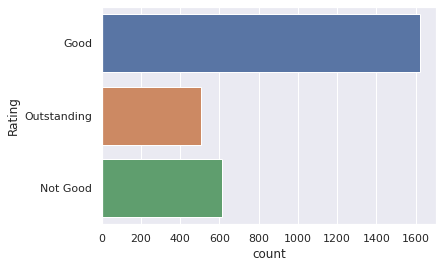

In [ ]:
kwn_rt_df['Rating']=kwn_rt_df['Rating'].str.replace('Inadequate','Not Good')
kwn_rt_df['Rating']=kwn_rt_df['Rating'].str.replace('Requires Improvement','Not Good')
sns.countplot(y = kwn_rt_df['Rating'])

In [ ]:
ref_df = kwn_rt_df.copy()
ref_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating
0,100049,202,Mixed,Does not apply,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good
1,100050,202,Girls,Does not apply,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good
2,100051,202,Mixed,Does not apply,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good
3,100052,202,Mixed,Does not apply,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good
4,100053,202,Mixed,Does not apply,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good


Estimating Baseline accuracy

- This problem is a classification problem and the approach to use in estimating the baseline accuracy is the ZeroR Algorithm which predicts the class value of that is most common in the training set.

Estimating Accuraccy with other classifiers

- To be able to perform the validation the Rating will be giving distinct value added to the column (Rating_Val) where **Outstanding=2, Good=1, Not Good=0**

In [ ]:
rat_df=ref_df[['Rating']]
rat_v_df = rat_df.replace(['Outstanding','Good','Not Good'], [2,1,0])
ref_df['Rating_Val']=rat_v_df
ref_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val
0,100049,202,Mixed,Does not apply,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good,1
1,100050,202,Girls,Does not apply,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good,1
2,100051,202,Mixed,Does not apply,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good,1
3,100052,202,Mixed,Does not apply,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good,1
4,100053,202,Mixed,Does not apply,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good,1


In [ ]:
from sklearn.model_selection import cross_val_score

- using k-fold cross validation

- K-Nearest Neighnour

In [ ]:
X = ref_df[['PNORG','PNORB','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMUNCFL','PNUMFSM','P8PUP','ATT8SCR','P8MEA']].values
y = ref_df['Rating_Val'].values
clf = neighbors.KNeighborsClassifier()
clf.fit(X,y)
predictions_k = clf.predict(X)
metrics.accuracy_score(y, predictions_k)

0.7302223842508203

In [ ]:
scores_kN = cross_val_score(clf.fit(X, y), X, y, cv= 5)
scores_kN.mean()

0.5964447635382181

- Logistic Regression

In [ ]:
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)
predictions_l = logreg.predict(X)
metrics.accuracy_score(y, predictions_l)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6620488516223113

In [ ]:
scores_log = cross_val_score(logreg.fit(X,y), X, y, cv= 5)
scores_log.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6569495964793319

- Naïve Bayes

In [ ]:
clsf_nai = naive_bayes.GaussianNB()
clsf_nai.fit(X,y)
predictions_n = clf.predict(X)
metrics.accuracy_score(y, predictions_n)

0.7302223842508203

In [ ]:
scores_nai = cross_val_score(clsf_nai.fit(X,y), X, y, cv= 5)
scores_nai.mean()

0.5165729328706473

> please note that we couldn't use the multinomialNB model because there are negative values in the dataset and this returns error using the model

Generating a fully labelled confusion matrix for one of the classifiers

- using the K-NN classifier

Text(30.5, 0.5, 'True Rating')

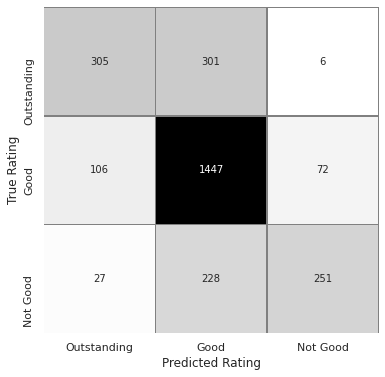

In [ ]:
cm = metrics.confusion_matrix(y, predictions_k)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, ax=ax, cbar=False, annot=True, fmt='d', cmap='binary', linecolor='grey', linewidths=0.3)
ax.set_xticklabels(['Outstanding','Good','Not Good']);
ax.set_yticklabels(['Outstanding','Good','Not Good']);
ax.set_xlabel('Predicted Rating')
ax.set_ylabel('True Rating')

**Feature Engineering**

Problem with classifers not working with the Progress * feature because of the negative values.

- while using the Naïve Bayes classifier the MultinomialNB method returned errors due to the negative values in the Progress 8 features. A simple solution to this is to perform a feature rescaling (Normalisation) which helps to put every feature in the positive range values 0 to 1

In [ ]:
clsf_nai_m = naive_bayes.MultinomialNB()
norm = preprocessing.MinMaxScaler()
X_norm = norm.fit_transform(X)
clsf_nai_m.fit(X_norm, y)
predictions_nm = clsf_nai_m.predict(X_norm)
metrics.accuracy_score(y, predictions_nm)

0.5924170616113744

In [ ]:
scores_nai = cross_val_score(clsf_nai_m.fit(X_norm, y), X_norm, y, cv= 5)
scores_nai.mean()

0.5924175342028639

> now we have an accuracy score for this classification model

Applying an encoding scheme to Gender attribute

- There is the option of applying one of the two below encodings to the Gender feature
1. Nominal Encoding
2. Ordinal Encoding
> Applying a **Nominal encoding** to the Gender attribute is our choice in this instance, where the categories are encoded into numbers without any ordering since there are no orders to the category of the Gender feature compared with the ordinal encoding which tends to encode in some ordering like a rank. Also this encoding makes use of less space than the original.

In [ ]:
le = preprocessing.LabelEncoder()
ref_df['en_GENDER']=le.fit_transform(ref_df['GENDER'])

Combining religious options

In [ ]:
ref_df['RELCHAR'].value_counts()

Does not apply                      1459
None                                 826
Roman Catholic                       262
Church of England                    135
Christian                             30
Jewish                                10
Church of England/Roman Catholic       6
Roman Catholic/Church of England       5
Muslim                                 5
Sikh                                   3
Church of England/Christian            1
Hindu                                  1
Name: RELCHAR, dtype: int64

In [ ]:
rel_df = ref_df[['RELCHAR']]
rel_df.head()

,RELCHAR
0,Does not apply
1,Does not apply
2,Does not apply
3,Does not apply
4,Does not apply


In [ ]:
no_relig = ['Does not apply', 'None']
rel_df['new_RELCHAR'] = [d if d in no_relig else 'religious' for d in rel_df['RELCHAR']]
rel_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RELCHAR,new_RELCHAR
0,Does not apply,Does not apply
1,Does not apply,Does not apply
2,Does not apply,Does not apply
3,Does not apply,Does not apply
4,Does not apply,Does not apply
5,None,None
6,Roman Catholic,religious
7,None,None
8,Roman Catholic,religious
9,Does not apply,Does not apply


In [ ]:
rel_df['new_RELCHAR'] = rel_df['new_RELCHAR'].replace(['Does not apply', 'None'],['non religious', 'non religious'])
rel_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RELCHAR,new_RELCHAR
0,Does not apply,non religious
1,Does not apply,non religious
2,Does not apply,non religious
3,Does not apply,non religious
4,Does not apply,non religious
5,None,non religious
6,Roman Catholic,religious
7,None,non religious
8,Roman Catholic,religious
9,Does not apply,non religious


In [ ]:
ref_df['RELCHAR'] = rel_df['new_RELCHAR']
ref_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val,en_GENDER
0,100049,202,Mixed,non religious,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good,1,2
1,100050,202,Girls,non religious,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good,1,1
2,100051,202,Mixed,non religious,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good,1,2
3,100052,202,Mixed,non religious,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good,1,2
4,100053,202,Mixed,non religious,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good,1,2


It is sensible combining the religious values because already it represents a classification of schools with religious character and those without, so it is best we generalise into two distinct values no matter the type of religion practised

- applying nominal encoding

In [ ]:
la = preprocessing.LabelEncoder()
ref_df['en_RELCHAR'] = la.fit_transform(ref_df['RELCHAR'])
ref_df.head(10)

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val,en_GENDER,en_RELCHAR
0,100049,202,Mixed,non religious,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good,1,2,0
1,100050,202,Girls,non religious,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good,1,1,0
2,100051,202,Mixed,non religious,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good,1,2,0
3,100052,202,Mixed,non religious,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good,1,2,0
4,100053,202,Mixed,non religious,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good,1,2,0
5,100054,202,Girls,non religious,85.8,14.2,1.5,17.1,36.9,62.3,0.8,36.6,12.9,3.9,3.2,107,95,63.4,0.74,0.48,1.00,5.83,0.888,0.748,0.607,0.551,0.402,0.888,1,0.95,0.04,0.02,0.93,0.05,0.02,Outstanding,2,1,0
6,100055,202,Mixed,religious,58.8,41.2,3.5,8.9,52.2,47.8,0.0,54.5,29.3,5.3,14.3,115,107,48.3,0.09,-0.15,0.34,4.56,0.670,0.452,0.800,0.409,0.261,0.609,3,0.99,0,0.01,0.98,0,0.02,Good,1,2,1
7,100056,202,Boys,non religious,7.7,92.3,1.8,6.8,43.7,56.1,0.2,55.0,28.0,5.4,15.6,111,105,46.2,-0.44,-0.69,-0.20,4.53,0.658,0.414,0.847,0.396,0.270,0.586,4,0.93,0.06,0.01,0.93,0.07,0,Good,1,0,0
8,100059,202,Girls,religious,98.6,1.4,0.8,8.1,43.9,56.0,0.1,42.2,17.3,4.9,9.5,173,169,54.6,0.54,0.34,0.73,4.84,0.775,0.532,0.566,0.329,0.214,0.763,1,0.97,0.03,0.01,0.99,0.01,0,Good,1,1,1
9,100092,202,Mixed,non religious,11.8,88.2,100.0,0.0,20.6,79.4,0.0,91.2,67.6,27.9,81.4,17,16,3.4,-2.98,-3.60,-2.35,0.23,0.059,0.000,0.000,0.000,0.000,0.000,5,0.63,0.25,0.13,SUPP,SUPP,SUPP,Good,1,2,0


Estimating accuracy of classifiers with new features (GENDER and RELCHAR)

- K-NN

In [ ]:
X_new = ref_df[['en_GENDER','en_RELCHAR','PNORG','PNORB','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMUNCFL','PNUMFSM','P8PUP','ATT8SCR','P8MEA']].values
y = ref_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_new,y)
predictions_kn = kn_clf.predict(X_new)
metrics.accuracy_score(y, predictions_kn)

0.7291286912139993

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_new,y), X_new, y, cv= 5)
scores_kN.mean()

0.5975389892704719

- Logistic Regression

In [ ]:
log_clf = linear_model.LogisticRegression()
log_clf.fit(X_new,y)
predictions_lg = log_clf.predict(X_new)
metrics.accuracy_score(y, predictions_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6613197229310973

In [ ]:
scores_log = cross_val_score(log_clf.fit(X_new,y), X_new, y, cv= 5)
scores_log.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6562190046933376

- Naïve Bayes

In [ ]:
na_clf = naive_bayes.GaussianNB()
na_clf.fit(X_new,y)
predictions_na = na_clf.predict(X_new)
metrics.accuracy_score(y, predictions_na)

0.5154939846882974

In [ ]:
scores_nai = cross_val_score(na_clf.fit(X_new,y), X_new, y, cv= 5)
scores_nai.mean()

0.49724183319372983

Handling features with a mix of numeric and non-numeric values
- Earlier in the previous components (component two), these features which contained a mix of numeric and non-numeric values (SUPP and SP) were temporary handled by replacing the non-numeric values with a specific numeric value for visualization of distribution. The features which contains this mix are (P8_BANDING, OVERALL_DESTPER, NOT_SUSTAINEDPER,UNKNOWNPER, OVERALL_DESTPER_DIS,	NOT_SUSTAINEDPER_DIS, UNKNOWNPER_DIS)
> A method for making these features usable by the classifiers is if these non-numeric values are replaced with numeric values. These non-numeric values SUPP and SP are used to represent suppressed data and small percentage less than 0.5 respectively. Since the required value are supposed to range from 0 to 1 and considering the initial condition for using these representations in the first place, taking the average value which is 0.5 to replace these values is the method to go with.

In [ ]:
final_df = ref_df.replace(['SUPP', 'SP'],[0.5,0.5])
final_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val,en_GENDER,en_RELCHAR
0,100049,202,Mixed,non religious,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3.0,0.90,0.09,0.01,0.89,0.11,0.01,Good,1,2,0
1,100050,202,Girls,non religious,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1.0,0.94,0.04,0.02,0.95,0.04,0.01,Good,1,1,0
2,100051,202,Mixed,non religious,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3.0,0.86,0.08,0.05,0.85,0.09,0.06,Good,1,2,0
3,100052,202,Mixed,non religious,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14.0,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3.0,0.91,0.08,0.01,0.87,0.13,0.00,Good,1,2,0
4,100053,202,Mixed,non religious,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3.0,0.95,0.04,0.01,0.90,0.07,0.03,Good,1,2,0


- classifier accuracy with these features

- K-NN

In [ ]:
X_n = final_df[['en_GENDER','en_RELCHAR','PNORG','PNORB','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMUNCFL','PNUMFSM','P8PUP','ATT8SCR','P8MEA','P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER','UNKNOWNPER']].values
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_n,y)
predictions_kn = kn_clf.predict(X_n)
metrics.accuracy_score(y, predictions_kn)

0.7298578199052133

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_n,y), X_n, y, cv= 5)
scores_kN.mean()

0.5979046175528167

- Logistic Regression

In [ ]:
log_clf = linear_model.LogisticRegression()
log_clf.fit(X_n,y)
predictions_lg = log_clf.predict(X_n)
metrics.accuracy_score(y, predictions_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6678818811520233

In [ ]:
scores_log = cross_val_score(log_clf.fit(X_n,y), X_n, y, cv= 5)
scores_log.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6605925837288767

- Naïve Bayes

In [ ]:
na_clf = naive_bayes.GaussianNB()
na_clf.fit(X_n,y)
predictions_na = na_clf.predict(X_n)
metrics.accuracy_score(y, predictions_na)

0.5446591323368575

In [ ]:
scores_nai = cross_val_score(na_clf.fit(X_n,y), X_n, y, cv= 5)
scores_nai.mean()

0.5260466940555488

Applying Standardisation and Normalization

- Standardisation

In [ ]:
# K-NN
scaler = preprocessing.StandardScaler()
X_sc = scaler.fit_transform(X_n)
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_sc,y)
predictions_kn = kn_clf.predict(X_sc)
metrics.accuracy_score(y, predictions_kn)

0.7513671162960263

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_sc,y), X_sc, y, cv= 5)
scores_kN.mean()

0.6146537167776847

In [ ]:
# Logistic Regression
log_clf = linear_model.LogisticRegression()
log_clf.fit(X_sc,y)
predictions_lg = log_clf.predict(X_sc)
metrics.accuracy_score(y, predictions_lg)

0.6766314254465913

In [ ]:
scores_log = cross_val_score(log_clf.fit(X_sc,y), X_sc, y, cv= 5)
scores_log.mean()

0.6649781287809289

In [ ]:
# Naive Bayes
na_clf = naive_bayes.GaussianNB()
na_clf.fit(X_sc,y)
predictions_na = na_clf.predict(X_sc)
metrics.accuracy_score(y, predictions_na)

0.5446591323368575

In [ ]:
scores_nai = cross_val_score(na_clf.fit(X_sc,y), X_sc, y, cv= 5)
scores_nai.mean()

0.5260466940555488

- Normalisation

In [ ]:
# K-NN
norm = preprocessing.MinMaxScaler()
X_nm = norm.fit_transform(X_n)
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_nm,y)
predictions_kn = kn_clf.predict(X_nm)
metrics.accuracy_score(y, predictions_kn)

0.7448049580751003

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_nm,y), X_nm, y, cv= 5)
scores_kN.mean()

0.6204851554917369

In [ ]:
# Logistic Regression
log_clf = linear_model.LogisticRegression()
log_clf.fit(X_nm,y)
predictions_lg = log_clf.predict(X_nm)
metrics.accuracy_score(y, predictions_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6784542471746263

In [ ]:
scores_log = cross_val_score(log_clf.fit(X_nm,y), X_nm, y, cv= 5)
scores_log.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6715328467153285

In [ ]:
# Naive Bayes
na_clf = naive_bayes.GaussianNB()
na_clf.fit(X_nm,y)
predictions_na = na_clf.predict(X_nm)
metrics.accuracy_score(y, predictions_na)

0.5446591323368575

In [ ]:
scores_nai = cross_val_score(na_clf.fit(X_nm,y), X_nm, y, cv= 5)
scores_nai.mean()

0.5260466940555488

Other Feature engineering approach to increase accuracy

1. Binarisation
  - The PNUMUNCFL feature which records pupils whose first language are unclassified contains lots of zero values which means at this point where zero is recorded every student is classified , therefore Binarisation can be performed on this feature to create a new feature that indicates if the pupils first language are all classified or not (FILCLF)

In [ ]:
b = preprocessing.Binarizer(threshold=0)
final_df['FILCLF'] =  b.fit_transform(final_df['PNUMUNCFL'].values.reshape(-1,1))
final_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val,en_GENDER,en_RELCHAR,FILCLF
0,100049,202,Mixed,non religious,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3.0,0.90,0.09,0.01,0.89,0.11,0.01,Good,1,2,0,1.0
1,100050,202,Girls,non religious,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1.0,0.94,0.04,0.02,0.95,0.04,0.01,Good,1,1,0,1.0
2,100051,202,Mixed,non religious,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3.0,0.86,0.08,0.05,0.85,0.09,0.06,Good,1,2,0,0.0
3,100052,202,Mixed,non religious,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14.0,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3.0,0.91,0.08,0.01,0.87,0.13,0.00,Good,1,2,0,0.0
4,100053,202,Mixed,non religious,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3.0,0.95,0.04,0.01,0.90,0.07,0.03,Good,1,2,0,1.0


In [ ]:
# K-NN
new_X = final_df[['FILCLF','en_GENDER','en_RELCHAR','PNORG','PNORB','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMFSM','P8PUP','ATT8SCR','P8MEA','P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER','UNKNOWNPER']].values
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(new_X,y)
predictions_kn = kn_clf.predict(new_X)
metrics.accuracy_score(y, predictions_kn)

0.7309515129420343

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(new_X,y), new_X, y, cv= 5)
scores_kN.mean()

0.5982702458351615

2. Log Transformation:
  - This feature engineering approach is used to compress higher values or values skewed to a side, in order to lead to a more normal distribution.
  we will try to apply this approach to the P8PUP feature which appears to be skewed to the left.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


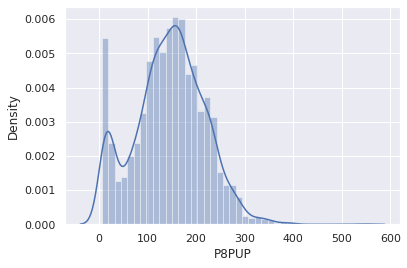

In [ ]:
sns.distplot(final_df['P8PUP'])

In [ ]:
final_df['P8PUP_log'] = final_df['P8PUP'].apply(np.log10)
final_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating,Rating_Val,en_GENDER,en_RELCHAR,FILCLF,P8PUP_log
0,100049,202,Mixed,non religious,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3.0,0.90,0.09,0.01,0.89,0.11,0.01,Good,1,2,0,1.0,2.250420
1,100050,202,Girls,non religious,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1.0,0.94,0.04,0.02,0.95,0.04,0.01,Good,1,1,0,1.0,2.214844
2,100051,202,Mixed,non religious,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3.0,0.86,0.08,0.05,0.85,0.09,0.06,Good,1,2,0,0.0,2.143015
3,100052,202,Mixed,non religious,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14.0,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3.0,0.91,0.08,0.01,0.87,0.13,0.00,Good,1,2,0,0.0,2.274158
4,100053,202,Mixed,non religious,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3.0,0.95,0.04,0.01,0.90,0.07,0.03,Good,1,2,0,1.0,2.107210


In [ ]:
# K-NN
new_X = final_df[['P8PUP_log','FILCLF','en_GENDER','en_RELCHAR','PNORG','PNORB','PSENELSE','PSENELK','PNUMEAL','PNUMENGFL','PNUMFSM','ATT8SCR','P8MEA','P8_BANDING', 'OVERALL_DESTPER', 'NOT_SUSTAINEDPER','UNKNOWNPER']].values
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(new_X,y)
predictions_kn = kn_clf.predict(new_X)
metrics.accuracy_score(y, predictions_kn)

0.7265767407947503

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(new_X,y), new_X, y, cv= 5)
scores_kN.mean()

0.6077393535691968

**Feature Selection Task**

Difference between Filter and Wrapper Method
- The Wrapper method gets to loop through every feature available via an algorithm, adding the features that gives the best result for the classifier which leads to a better accuracy while also removing the ones that gives less best result while going through the loop. An advantage is it gives the best accuracy while it interacts with the classifier, however a disadvantage is that it is slow in its process having to loop through every feature
- The filter on the other hand uses objective statistics to rank each of the features in order to choose the best feature for the classifier, exmaple of this statistical approach is variance, correlation, independence, mutual information. An advantage of this method is that it is fast when compared with the wrapper method while a disadvantage of this approach is that it ignores interaction with the classifier and just focuses on ranking the features based on statistical means

Filter Methods:
- Variance: This filter method checks how much difference or variability there are in the feature values as it ignores the features with less variability because it doesn't help with predictions. Advantage of this approach is that it is easy to calculate and can work with unsupervised learning however not having correlation between features which is the feature we are trying to predict is a disadvantage.
- Correlation: This checks how much covariance is between features and label, which is checking how much they vary together. That is, how much of the variance in one feature is because of the variance in the other feature.
- Mutual information: This filter method measure the amount of information shared between two variables, that is the amount of information one feature tells about another feature. The information in this sense is the measure of entropy in a random selection of a feature value.

Chosen filter method is the Correlation Method.

In [ ]:
fs = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=10)
X_fs = fs.fit_transform(new_X, y)
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_fs,y)
predictions_kn = kn_clf.predict(X_fs)
metrics.accuracy_score(y, predictions_kn)

0.7324097703244623

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_fs,y), X_fs, y, cv= 5)
scores_kN.mean()

0.6084652919043251

In [ ]:
# Logistic Regression
log_clf = linear_model.LogisticRegression()
log_clf.fit(X_fs,y)
predictions_lg = log_clf.predict(X_fs)
metrics.accuracy_score(y, predictions_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6401749908858914

In [ ]:
scores_log = cross_val_score(log_clf.fit(X_fs,y), X_fs, y, cv= 5)
scores_log.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6405408639463923

In [ ]:
# Naive Bayes
na_clf = naive_bayes.GaussianNB()
na_clf.fit(X_fs,y)
predictions_na = na_clf.predict(X_fs)
metrics.accuracy_score(y, predictions_na)

0.6193948231862924

In [ ]:
scores_nai = cross_val_score(na_clf.fit(X_fs,y), X_fs, y, cv= 5)
scores_nai.mean()

0.6099218220254478

Applying Wrapper Method using Forward Selection with a random forest classifier

- using a train test split for the data for accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.drop(['Rating_Val','GENDER','URN','LA','RELCHAR','Rating'],axis=1),final_df['Rating_Val'],test_size=.2,random_state=1)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
# Sequential Forward Selection(sfs)
sfs = SFS(RandomForestClassifier(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 5)
sfs.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [ ]:
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['PNORG', 'PNUMEAL', 'PNUMFSM', 'PPERSABS10', 'P8CILOW', 'EBACCAPS',
       'PTL2BASICS_95', 'P8_BANDING', 'UNKNOWNPER', 'NOT_SUSTAINEDPER_DIS',
       'UNKNOWNPER_DIS', 'en_GENDER', 'en_RELCHAR', 'FILCLF', 'P8PUP_log'],
      dtype='object')


In [ ]:
print(sfs.k_score_)

0.6768485869712193


Now using the K-NN classifier using the features produced in the wrapper method above(This changes after every run) to get the best accuracy.

In [ ]:
X_wrp = final_df[['PSENELSE', 'PSENELK', 'PNUMENGFL', 'PNUMFSM', 'PPERSABS10', 'P8PUP',
       'ATT8SCR', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'P8_BANDING',
       'UNKNOWNPER', 'UNKNOWNPER_DIS', 'en_GENDER', 'en_RELCHAR', 'FILCLF']].values
y = final_df['Rating_Val'].values
kn_clf = neighbors.KNeighborsClassifier()
kn_clf.fit(X_wrp,y)
predictions_kn = kn_clf.predict(X_wrp)
metrics.accuracy_score(y, predictions_kn)

0.7400656215822092

In [ ]:
scores_kN = cross_val_score(kn_clf.fit(X_wrp,y), X_wrp, y, cv= 5)
scores_kN.mean()

0.6073810378524989